- REFERENCIAS

- Rasmussen, C. E., & Williams, C. K. I. (2006). Gaussian Processes for Machine Learning. The MIT Press.
- McElreath, R. (2020). Statistical Rethinking: A Bayesian Course with Examples in R and Stan. CRC Press.
- GPflow: A Gaussian Process Library using TensorFlow. (2023). Retrieved from https://gpflow.github.io
- yfinance Documentation. (2023). Retrieved from https://pypi.org/project/yfinance/

---

Primeiro passo, importação das bibliotecas que serão utilizadas ao longo do projeto.

Em tradução livre, O PyMC é uma biblioteca de programação probabilística para Python que permite aos usuários construir modelos bayesianos com uma API Python simples e ajustá-los usando métodos de cadeia de Markov Monte Carlo (MCMC).
O PyMC se esforça para tornar a modelagem Bayesiana o mais simples e indolor possível, permitindo que os usuários se concentrem no problema e não nos métodos.
Referência: https://www.pymc.io/welcome.html

Em tradução nossa, O NumPy é uma biblioteca de código aberto desenvolvida pela comunidade, que fornece um objeto de matriz Python multidimensional, juntamente com funções de reconhecimento de matriz que operam nele. Por causa de sua simplicidade inerente, o array NumPy é o formato de troca de fato para dados de matriz em Python.
O NumPy opera em matrizes em memória usando a unidade central de processamento (CPU). Para utilizar armazenamento e hardware modernos e especializados, houve uma proliferação recente de pacotes de matriz Python.
Referência: https://www.nature.com/articles/s41586-020-2649-2

Em tradução livre, ArviZ é um pacote Python para análise exploratória de modelos bayesianos. ArviZ tem muitas funções para nos ajudar a resumir o posterior. Ele serve como uma ferramenta independente de backend para diagnosticar e visualizar a inferência bayesiana.
Referência: MARTIN, O. Bayesian Analysis with Python: Introduction to statistical modeling and probabilistic programming using PyMC3 and ArviZ. 2. ed. UK: Packt Publishing, 2018. p. 33

... A biblioteca Pandas propicia: avanços
na análise de dados. Coelho, A. S. (2017), descreve como uma biblioteca licenciada com código aberto que fornece estruturas de alto
desempenho e fácil manuseio focada na análise de dados
junto ao Python. Diante desse cenário, é um instrumento
com diversas funcionalidades para análise de grandes bases
de dados.
Referência: Dos Santos, Wellington & Moreno, Giselle & Yara, Ricardo. (2022). Anais do VI Simpósio de Inovação em Engenharia Biomédica - SABIO 2022.

Em tradução livre, Matplotlib é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python. Matplotlib torna coisas fáceis fáceis e coisas difíceis possíveis, como criar plotagens com qualidade de publicação, criar figuras interativas que podem ampliar, deslocar, atualizar, personalizar estilo visual e layout, exportar para vários formatos de arquivo, incorporar no JupyterLab e interfaces gráficas de usuário e usar uma rica variedade de pacotes de terceiros criados em Matplotlib.
Referência: MATPLOTLIB. Matplotlib: Python plotting — Matplotlib 3.1.1 documentation. Disponível em: <https://matplotlib.org/>.

Em tradução livre, Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib. Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.
Referência: SEABORN. seaborn: statistical data visualization — seaborn 0.9.0 documentation. Disponível em: <https://seaborn.pydata.org/>.

PARA FALARMOS DA YAHOO FINANCE CITAR NOSSO ARTIGO PUBLICADO

##Importação das bibliotecas

In [48]:
import yfinance as yf
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import pytensor.tensor as tt
from datetime import date

- pymc: Biblioteca usada para realizar modelagem estatística bayesiana.
- numpy: Biblioteca fundamental para computação numérica em Python.
- arviz: Biblioteca usada para análise e visualização dos resultados de modelos bayesianos.
- pandas: Biblioteca para manipulação e análise de dados.
seaborn: Biblioteca para visualização de dados baseada no matplotlib.
- yfinance: Biblioteca que permite acessar dados financeiros históricos de diferentes ativos.
- matplotlib.pyplot: Biblioteca para criação de gráficos e visualizações.

##Extração dos dados históricos

In [49]:
# Obtendo os dados historicos

# Este trecho obtém os dados históricos diários
# do ticker "CYRE3.SA" ou "ABEV3.SA"
# para o período de um ano e extrai a série temporal dos preços de fechamento.

tickerData = yf.Ticker("CYRE3.SA")

# period é o parametro onde passa o tempo em que quer pegar os dados historicos
# interval é o parametro de intervalo dos dados historicos
tickerDf = tickerData.history(period='1y', interval='1d')

tickerClose = tickerDf.Close

# Aqui, calculam-se os retornos diários dos preços de fechamento e
# remove-se qualquer valor NaN resultante da operação pct_change().
daily_returns_nan = tickerClose.pct_change()
daily_returns = daily_returns_nan.dropna()

# n armazena o número de retornos diários.
n = len(daily_returns)

print('Retorno Diário da CYRE3')
daily_returns

Retorno Diário da CYRE3


Date
2023-06-13 00:00:00-03:00   -0.016214
2023-06-14 00:00:00-03:00    0.020202
2023-06-15 00:00:00-03:00    0.013028
2023-06-16 00:00:00-03:00   -0.020062
2023-06-19 00:00:00-03:00    0.019948
                               ...   
2024-06-05 00:00:00-03:00    0.019131
2024-06-06 00:00:00-03:00    0.023338
2024-06-07 00:00:00-03:00   -0.029747
2024-06-10 00:00:00-03:00   -0.011753
2024-06-12 00:00:00-03:00   -0.020165
Name: Close, Length: 249, dtype: float64

O módulo `Ticker` nativa da biblioteca _yfinance_ que recebe como parâmetro um ticker ou sigla da empresa que é representada em bolsa e permite acessar os dados da empresa. (Não esquecer de citarnos sobre ações ON e PN final 3 e final 4 e caso queira UNITs final 11)

O módulo `Ticker.history()`, recebe dois parâmetros, sendo `period` e `interval`, onde representam, respectivamente, o período em que será resgatado os dados sobre a empresa e o intervalo dentro do período, para a elaboração desse trabalho usamos `period = 3y` ou seja um espaço de tempo de 3 anos e `interval = 1d` ou seja o valor da ação em um dia por três anos.

A função `Ticker.Close` retorna os valores de fechamento ou encerramento do pregão da B3, lembrando que retorna o valor de fechamento e não o valor de fechamento ajustado que é onde o valor do dividendo é ajustado no valor da ação.

A função `pct_change()` nativa do pandas, segundo | **pandas.DataFrame.pct_change — pandas 1.3.4 documentation.** Disponível em: <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html>. | ela realiza a Mudança fracionária entre o elemento atual e um elemento anterior.
Calcula a alteração fracionária da linha imediatamente anterior. Isso é útil para comparar a fração de mudança em um tempo uma série de elementos.
Apesar do nome deste método, ele calcula a mudança fracionária (também conhecido como por mudança de unidade ou mudança relativa) e não variação percentual. Se você precisar de alteração percentual, multiplique estes valores em 100.

Ou seja, está pegando o valor da oscilação da ação e não contabilizando o valor de face dela e utilizando a função `dropna()` também nativa dos pandas para retirar os valores nulos ou NaN, significando, que naquele determinado dia não houve alteração do valor da ação no momento do fechamento do pregão.

---


- `yf.Ticker("ABEV3.SA")`: Cria um objeto Ticker para o ativo "CYRE3.SA" ou "ABEV3".
- `tickerData.history(period='1y', interval='1d')`: Obtém os dados históricos diários do ativo para o período de um ano.
- `tickerDf.Close`: Extrai a série temporal dos preços de fechamento do DataFrame resultante.
- `print(daily_returns)`: Imprime os retornos diários calculados.
- `print(len(daily_returns))`: Imprime o número total de retornos diários (deve ser n-1).

##Normalização dos dados

In [50]:
# Normalizacao do Indice de Datas
# Converte os índices para um formato de dias e, em seguida,
# normaliza o índice de datas para o intervalo [0, 1].

daily_returns.index = pd.to_datetime(daily_returns.index)
daily_returns.index = (daily_returns.index - daily_returns.index[0]).days

min_day = daily_returns.index.min()
max_day = daily_returns.index.max()

normalized_index = (daily_returns.index - min_day) / (max_day - min_day)

daily_returns.index = normalized_index
print('Indice normalizado da ação CYRE3')
daily_returns

Indice normalizado da ação CYRE3


Date
0.000000   -0.016214
0.002740    0.020202
0.005479    0.013028
0.008219   -0.020062
0.016438    0.019948
              ...   
0.980822    0.019131
0.983562    0.023338
0.986301   -0.029747
0.994521   -0.011753
1.000000   -0.020165
Name: Close, Length: 249, dtype: float64

Foi utilizado a função `pandas.to_datetime()` que é nativa da biblioteca Pandas para retirar do index o dado do tipo Timestamp que é a data em conjunto com as horas e fuso horário, esse dado foi retirado de nossa análise tendo em vista que estamos trabalhando com o valor diário do fechamento da ação, então nossa granularidade é um pouco maior do que a utilizada em day trading, por exemplo, que eles visam a oscilação em minutos e até mesmo segundos.

O trecho de código abaixo retira esse valor do index e enumera de 0 até n que é a quantidade de ações observadas no período de 1 e 5 anos.
```
daily_returns.index = pd.to_datetime(daily_returns.index)
daily_returns.index = (daily_returns.index - daily_returns.index[0]).days
```
Após alterarmos os index que era dado timestamp com data, hora e fuso horário, respectivamente, para numeração de 0 até 1093, onde temos o total de 1094 retornos diários observados.
Na data essa normalização é feita para facilitar o manuseio dos dados e na predição dos valores.

A normalização é feito usando a seguinte fórmula:


$\text{Indice Normalizado} = \frac{\text{Indice do DataFrame} - \text{Dia Minimo}}{\text{Dia Maximo} - \text{Dia Minimo}}$


---

- `tickerClose.pct_change()`: Calcula os retornos diários percentuais dos preços de fechamento.
- `daily_returns_nan.dropna()`: Remove os valores NaN resultantes da operação pct_change().
- `n = len(daily_returns)`: Armazena o número de retornos diários no variável n.
- `pd.to_datetime(daily_returns.index)`: Converte os índices (datas) para o formato datetime.
- `daily_returns.index - daily_returns.index[0]`: Converte os índices de datas para uma contagem de dias a partir da primeira data.
min_day e max_day: Calculam o dia mínimo e máximo (em dias desde o início da série).
- `normalized_index`: Normaliza o índice de datas para o intervalo [0, 1].
- `daily_returns.index` = normalized_index: Atualiza o índice dos retornos diários para o índice normalizado.

##Separação e Divisão dos dados de Treino e Teste

In [51]:
x = daily_returns.index.values.T
y = daily_returns.values.T
n = len(daily_returns)

# Separando os conjuntos de Treino e Teste
# Divide os dados em conjuntos de treinamento (80%) e teste (20%)
prop_train = 0.8 # Valor fixo por ser Time Series
n_train = round(prop_train * n)

x_train = x[:n_train]
y_train = y[:n_train]

x_test = x[n_train:]
y_test = y[n_train:]

###Transposição dos Dados
```x = daily_returns.values.T```:
- Extrai os valores dos índices (datas) do DataFrame ```daily_returns``` e os transpõe (```.T```).

- ```daily_returns.index.values```: Obtém os valores do índice, que representam as datas.

- ```.T```: Transpõe esses valores, transformando a estrutura de dados para facilitar o uso posterior.

```y = daily_returns.values.T```:
- Extrai os valores dos retornos diários do DataFrame ```daily_returns``` e os transpõe (```.T```).

- ```daily_returns.values``` obtém os valores dos retornos diários.

- ```.T``` transpõe esses valores, organizando-os de forma similar a ```x```.

```n = len(daily_returns)```:
- Calcula o número total de observações (dias) no DataFrame ```daily_returns```.

###Separação dos Conjuntos de Treinamento e Teste
```prop_train = 0.8```:
- Define a proporção dos dados a serem usados para treinamento. Aqui, 80% dos dados serão usados para treinamento.

```n_train = round(prop_train * n)```:
- Calcula o número de observações a serem usadas para o conjunto de treinamento.

- Multiplica o número total de observações (```n```) pela proporção de treinamento (```prop_train```).

- A função ```round``` arredonda o resultado para o inteiro mais próximo.

###Divisão dos Dados em Conjuntos de Treinamento e Teste
```x_train = x[:n_train]```:
- Seleciona os primeiros ```n_train``` valores de ```x``` para formar o conjunto de treinamento.

- ```x[:n_train]``` pega os elementos desde o início até ```n_train``` (não incluindo ```n_train```).

```y_train = y[:n_train]```:
- Seleciona os primeiros ```n_train``` valores de ```y``` para formar o conjunto de treinamento.

- ```y[:n_train]``` pega os elementos desde o início até ```n_train``` (não incluindo ```n_train```).

```x_test = x[n_train:]```:

- Seleciona os valores restantes de ```x``` para formar o conjunto de teste.
- ```x[n_train:]``` pega os elementos desde ```n_train``` até o final.

```y_test = y[n_train:]```:

- Seleciona os valores restantes de ```y``` para formar o conjunto de teste.
- ```y[n_train:]``` pega os elementos desde ```n_train``` até o final.

##Plotagem do Split de Treino e Teste

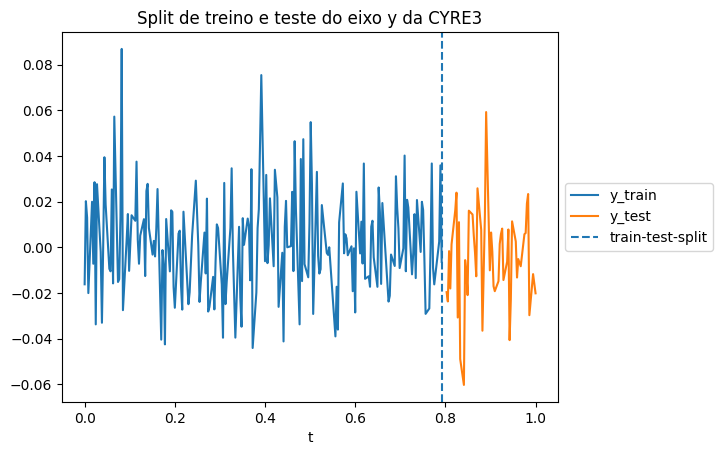

In [52]:
# Visualização dos Dados de Treinamento e Teste
# Cria um gráfico de linhas para visualizar os conjuntos de treinamento e teste

fig, ax = plt.subplots()
sns.lineplot(x=x_train.flatten(), y=y_train.flatten(), label='y_train', ax=ax)
sns.lineplot(x=x_test.flatten(), y=y_test.flatten(), label='y_test', ax=ax)
ax.axvline(x=x_train.flatten()[-1], linestyle='--', label='train-test-split')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Split de treino e teste do eixo y da CYRE3', xlabel='t', ylabel='');

- `plt.subplots()`: Cria uma figura e um eixo para plotagem.
- `sns.lineplot`: Plota as séries temporais de treinamento e teste.
- `ax.axvline`: Adiciona uma linha vertical indicando a divisão entre treinamento e teste.
- `ax.legend` e `ax.set`: Configuram a legenda e os rótulos do gráfico.

#Modelo A
Modelo A usando o kernel de covariância Matern32 com $σ$ (desvio padrão) = 1.

Agora vamos detalhar cada trecho do código:
```
with pm.Model() as model_A:
```
Esta linha inicia um novo modelo do PyMC3 chamado ```model_A```. Tudo o que estiver dentro deste bloco with será parte do modelo.
```
  l_ratquad = pm.HalfNormal('l_ratquad', sigma=1)
  alpha_ratquad = pm.HalfNormal('alpha_ratquad', sigma=1)
  sigma_ratquad = pm.HalfNormal('sigma_ratquad', sigma=1)
```
No trecho de código acima, se tem três hiperparâmetros do kernel do ```RatQuad``` são definidos como distribuições Half-Normal.

O hipermarâmetro ```l_ratquad``` é o comprimento de escala, ```alpha_ratquad``` é um parâmetro de suavização e ```sigma_ratquad``` é o parâmetro de amplitude.

```
  l_matern32 = pm.HalfNormal('l_matern32', sigma=1)
  sigma_matern32 = pm.HalfNormal('sigma_matern32', sigma=1)
```
Aqui temos dois hiperparâmetros do kernel Matern32 são definidos da mesma forma. ```l_matern32``` é o comprimento de escala e ```sigma_matern32``` é o parâmetro de amplitude.

Utilizando $\sigma = 1$
```
  cov_ratquad = sigma_ratquad * pm.gp.cov.RatQuad(1, l_ratquad, alpha_ratquad)
  cov_matern32 = sigma_matern32 * pm.gp.cov.Matern32(1, l_matern32)
  cov = cov_ratquad + cov_matern32
```
Aqui, os kernels RatQuad e Matern32 são combinados com seus respectivos hiperparâmetros para formar a função de covariância do Processo Gaussiano.

Esta função de covariância é a combinação das duas funções de covariância.
```
  a = pm.Normal("a",0,1)  # Media=0 e DP=1
  b = pm.Normal("b",0.5,0.05)  # Media=0.5 e DP=0.5
```
No trecho acima, são definidos os hiperparâmetros para o componente linear do modelo. Os valores ```a``` e ```b``` são os coeficientes intercepto e inclinação, respectivamente. Com $\mu = 0$ e $\sigma = 1$ para o intercepto ```a``` e $\mu = 0.5$ e $\sigma = 0.5$ para a inclinação ```b```.
```
  trend = pm.Deterministic("trend", a + b * x_train)
```
Aqui, é definida a tendência determinística do modelo, que é uma função linear de ```x_train``` com coeficientes ```a``` e ```b```.
```
  M = pm.gp.mean.Linear([b], a)
```
Este é o componente de média do GP, que é uma função linear.
```
  gp = pm.gp.Marginal(mean_func=M, cov_func=cov)
```
Aqui, o modelo GP marginal é definido usando a função de média ```M``` e a função de covariância ```cov```.
```
  sigma = pm.HalfNormal('sigma', sigma=1)
```
Este é o parâmetro de ruído do modelo, que é definido como uma distribuição Half-Normal com $\sigma = 1$
```
  y_obs = gp.marginal_likelihood('y', X=x_train.reshape(-1,1), y=y_train, noise=sigma)
```
Esta linha define a verossimilhança marginal do modelo. O ```x_train``` e ```y_train``` são os dados de entrada e saída, respectivamente, e $\sigma$ é o parâmetro de ruído.

In [53]:
# Modelo A usando Matern32 com sigma(desvio padrao) sendo 1
with pm.Model() as model_A:

    l_ratquad = pm.HalfNormal('l_ratquad', sigma=1)
    alpha_ratquad = pm.HalfNormal('alpha_ratquad', sigma=1)
    sigma_ratquad = pm.HalfNormal('sigma_ratquad', sigma=1)

    l_matern32 = pm.HalfNormal('l_matern32', sigma=1)
    sigma_matern32 = pm.HalfNormal('sigma_matern32', sigma=1)

    cov_ratquad = sigma_ratquad * pm.gp.cov.RatQuad(1, l_ratquad, alpha_ratquad)
    cov_matern32 = sigma_matern32 * pm.gp.cov.Matern32(1, l_matern32)

    cov = cov_ratquad + cov_matern32

    a = pm.Normal("a",0,1)
    b = pm.Normal("b",0.5,0.05)
    trend = pm.Deterministic("trend",a + b*x_train)
    M = pm.gp.mean.Linear([b],a)

    gp = pm.gp.Marginal(mean_func=M, cov_func=cov)
    sigma = pm.HalfNormal('sigma', sigma=1)
    y_obs = gp.marginal_likelihood('y', X=x_train.reshape(-1,1),y=y_train, noise=sigma)


/usr/local/lib/python3.10/dist-packages/pymc/gp/gp.py:56: FutureWarning: The 'noise' parameter has been been changed to 'sigma' in order to standardize the GP API and will be deprecated in future releases.
  warnings.warn(_noise_deprecation_warning, FutureWarning)


###Fórmula do kernel Matern 3/2
**Matern32**:
   - O kernel Matern32 é uma função de covariância que pertence à família Matern. Ele é parametrizado por um comprimento de escala (hiperparâmetro `ls`).
   - A função de covariância Matern32 é definida como:

     $$ k(x, x') = \left(1 + \frac{\sqrt{3} \cdot \|x - x'\|}{\text{ls}}\right) \cdot \exp\left(-\frac{\sqrt{3} \cdot \|x - x'\|}{\text{ls}}\right) $$
   
   - Possui uma suavidade intermediária ($\mu = 3/2$) e é menos suave do que o kernel Exponencial.
   - É frequentemente usado quando os dados têm características intermediárias entre tendências lineares e oscilações periódicas.

O Kernel Matern32 é menos suave e mais flexível, enquanto os demais Kernels. A escolha entre eles depende das características dos dados e da flexibilidade desejada no modelo. ¹²¹: [Documentação do PyMC sobre funções de covariância](https://docs.pymc.io/en/latest/api/gp/cov.html)
²: [Exemplo de uso do Matern32 e Matern52 no PyMC](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MeansAndCovs.html)

Fonte: conversa com o Copilot, 5/26/2024
(1) Covariance Functions — PyMC dev documentation. https://docs.pymc.io/en/latest/api/gp/cov.html.

(2) Mean and Covariance Functions — PyMC example gallery. https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MeansAndCovs.html.

(3) Mean and Covariance Functions — PyMC3 3.11.5 documentation. https://docs.pymc.io/en/v3/pymc-examples/examples/gaussian_processes/GP-MeansAndCovs.html.

(4) Sparse GP doesn't accept covariance function as noise #4998 - GitHub. https://github.com/pymc-devs/pymc/issues/4998.

(5) Learn PyMC & Bayesian modeling ??? PyMC 5.5.0 documentation. https://docs.pymc.io/en/v3/api/gp/cov.html.

##Sample da Priori do Modelo A


In [54]:
with model_A:
  prior = pm.sample_prior_predictive()

A função ```pm.sample_prior_predictive()``` é do PyMC3 que gera amostras das distribuições a priori dos parâmetros do modelo. Isso permite que você visualize quais tipos de valores os parâmetros do modelo podem assumir antes de observar os dados.

Ele gera amostras das distribuições a priori de tods os parâmetros definidos no modelo (```l_ratquad```, ```alpha_ratquad```, ```sigma_ratquad```, ```l_matern32```, ```sigma_matern32```, ```a```, ```b```, ```sigma```).

Avalia a função de verossimilhança que é ```gp.marginal_likelihood``` usando essas amostras a priori.

Armazena os resultados em um dicionário prior, onde as chaves são os nomes das variáveis do modelo e os valores são arrays com as amostras.

##Plotagem da amostra a priori do Modelo A


<ipython-input-55-a19ea3fe181c>:4: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(prior, group="prior_predictive", num_samples=100)["y"]
<ipython-input-55-a19ea3fe181c>:13: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(prior, group="prior", num_samples=100)["trend"] * y_train.max(),


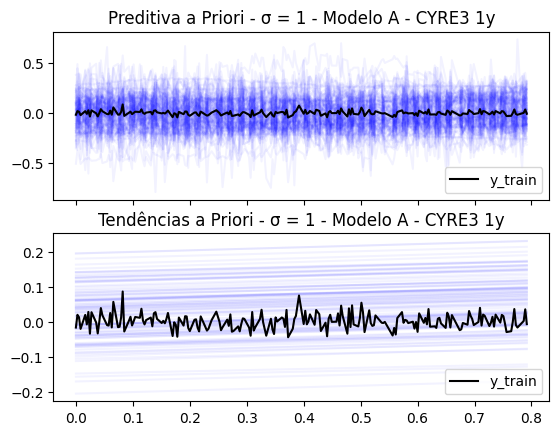

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].plot(
    x_train,
    az.extract_dataset(prior, group="prior_predictive", num_samples=100)["y"]
    * y_train.max(),
    color="blue",
    alpha=0.05,
)
sns.lineplot(x=x_train.flatten(), y=y_train.flatten(), color="k", label='y_train', ax=ax[0])
ax[0].set_title("Preditiva a Priori - σ = 1 - Modelo A - CYRE3 1y")
ax[1].plot(
    x_train,
    az.extract_dataset(prior, group="prior", num_samples=100)["trend"] * y_train.max(),
    color="blue",
    alpha=0.05,
)
sns.lineplot(x=x_train.flatten(), y=y_train.flatten(), color="k",label='y_train', ax=ax[1])
ax[1].set_title("Tendências a Priori - σ = 1 - Modelo A - CYRE3 1y");

##Plotando Amostras do Prior Predictive
Utilizando as bibliotecas Matplotlib, ArviZ e Seaborn para criar gráficos que ajudam a visualizar as amostras a priori do modelo `model_A`.

`plt.subplots(nrows=2, ncols=1, sharex=True)`:
- Cria uma figura (`fig`) com dois eixos (`ax`) dispostos em duas linhas e uma coluna. O argumento `sharex=True` faz com que os dois gráficos compartilhem o mesmo eixo x.

`ax[0].plot(...)`:
- Plota as amostras do prior predictive no primeiro eixo (`ax[0]`).

`x_train`:
- Valores do eixo x (dados de entrada).

`az.extract_dataset(prior, group="prior_predictive", num_samples=100)["y"]`:
- Extrai 100 amostras do prior predictive para a variável `y` usando ArviZ.

`*y_train.max()`:
- Escala as amostras multiplicando pelo valor máximo de `y_train`.

`color = "blue"`:
- Define a cor das linhas como azul.

`alpha = 0.05`:
- Define a transparência das linhas para 0.05, o que facilita a visualização de muitas amostras sobrepostas.

###Plotando os Dados de Treinamento
`sns.lineplot(...)`:
- Plota os dados de treinamento no primeiro eixo usando Seaborn.

`x_train.flatten()` e `y_train.flatten()`:
- Flatten transforma qualquer array multidimensional em unidimensional, garantindo que os dados estejam no formato correto para plotagem.

`color = "k"`:
- Define a cor da linha como preta.

`label = 'y_train'`:
- Adiciona um rótulo à linha, útil para a legenda.

`ax=ax[0]`:
- Especifica que este gráfico deve ser adicionado ao primeiro eixo (`ax[0]`).

###Definindo o Título do Primeiro Gráfico e Plotando Amostras da Tendência a Priori
`ax[0].set_title(...)`:
- Define o título do primeiro gráfico.

`ax[1].plot(...)`:
- Plota as amostras da tendência a priori no segundo eixo (`ax[1]`).

`x_train`:
- Valores do eixo x (dados de entrada).

`az.extract_dataset(prior, group="prior", num_samples=100)["trend"]`:
- Extrai 100 amostras do prior para a variável trend usando ArviZ.

`*y_train.max()`:
- Escala as amostras multiplicando pelo valor máximo de `y_train`.

`color = "blue"`:
- Define a cor da linha como azul.

`alpha = 0.05`:
- Define a transparência das linhas para 0.05

###Plotando os Dados de Treinamento no Segundo Gráfico e Definindo o Título do Segundo Gráfico
`sns.lineplot(...)`:
- Plota os dados de treinamento no segundo eixo usando Seaborn.

`x_train.flatten()` e `y_train.flatten()`:
- Garantem que os dados estejam no formato correto para plotagem.

`color = "k"`:
- Define a cor da linha como preta.

`label = 'y_train'`:
- Adiciona um rótulo à linha.

`ax=ax[1]`:
- Especifica que este gráfico deve ser adicionado ao segundo eixo (`ax[1]`).

`ax[1].set_title(...)`:
- Define o título do segundo gráfico.

##Refinando o Modelo A
No segundo trecho do `model_A`, foram ajustados o $\sigma$ da matriz de covariância do Kernel Matern32 para $\sigma = 4$ e os hiperparâmetros para o componente linear do modelo. Sendo os novos valores `a` e `b` que são os coeficientes intercepto e inclinação, respectivamente. Com $\mu = 0$ e $\sigma = 1$ para o intercepto `a` e $\mu = 0$ e $\sigma = 0.125$ para a inclinação `b`.

Ao alterarmos o desvio padrão (σ) no modelo de processo gaussiano com kernel Matérn 3/2 para analisar dados históricos de uma ação em série temporal, estamos ajustando a amplitude das variações que o modelo considera em suas previsões.

Isso pode ter um impacto significativo no ajuste do modelo aos dados históricos e na capacidade do modelo de fazer previsões precisas.


###Desvio Padrão Baixo (σ pequeno)
**Suavização das Previsões**:
- Previsões mais suaves e menos voláteis.
- Modelo considera variações menores em torno da tendência subjacente.

**Menor Sensibilidade a Flutuações de Curto Prazo**:
- Modelo menos sensível a flutuações de curto prazo nos dados históricos.
- Maior foco na tendência de longo prazo.

###Desvio Padrão Alto (σ grande)
**Previsões Mais Voláteis**:
- Previsões mais voláteis devido a variações maiores em torno da tendência subjacente.

**Maior Sensibilidade a Flutuações de Curto Prazo**:
- Modelo mais sensível a flutuações de curto prazo nos dados históricos.
- Reflexo maior das flutuações de curto prazo nas previsões.

In [56]:
# Modelo A usando Matern32 com sigma(desvio padrao) sendo 4
with pm.Model() as model_A:

    l_ratquad = pm.HalfNormal('l_ratquad', sigma=4)
    alpha_ratquad = pm.HalfNormal('alpha_ratquad', sigma=4)
    sigma_ratquad = pm.HalfNormal('sigma_ratquad', sigma=4)

    # Sigma do Matern32 sendo 0.1
    l_matern32 = pm.HalfNormal('l_matern32', sigma=0.1)
    sigma_matern32 = pm.HalfNormal('sigma_matern32', sigma=0.1)

    cov_ratquad = sigma_ratquad * pm.gp.cov.RatQuad(1, l_ratquad, alpha_ratquad)
    cov_matern32 = sigma_matern32 * pm.gp.cov.Matern32(1, l_matern32)

    cov = cov_ratquad + cov_matern32

    a = pm.Normal("a",0,1)# Media=0 e DP=1
    b = pm.Normal("b",0,0.125)# Media=0 e DP=0.0125
    trend = pm.Deterministic("trend",a + b*x_train)
    M = pm.gp.mean.Linear([b],a)

    gp = pm.gp.Marginal(mean_func=M, cov_func=cov)
    sigma = pm.HalfNormal('sigma', sigma=1)
    y_obs = gp.marginal_likelihood('y', X=x_train.reshape(-1,1),y=y_train, noise=sigma)


/usr/local/lib/python3.10/dist-packages/pymc/gp/gp.py:56: FutureWarning: The 'noise' parameter has been been changed to 'sigma' in order to standardize the GP API and will be deprecated in future releases.
  warnings.warn(_noise_deprecation_warning, FutureWarning)


##Sample do Modelo A com os valores ajustados

In [57]:
with model_A:
  prior = pm.sample_prior_predictive()

##Plotagem do Gráfico com os novos valores ajustados

<ipython-input-58-d15cfceb60c7>:4: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(prior, group="prior_predictive", num_samples=100)["y"]
<ipython-input-58-d15cfceb60c7>:13: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(prior, group="prior", num_samples=100)["trend"] * y_train.max(),


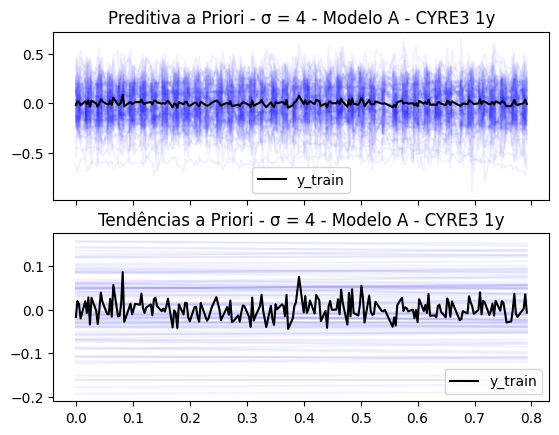

In [58]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].plot(
    x_train,
    az.extract_dataset(prior, group="prior_predictive", num_samples=100)["y"]
    * y_train.max(),
    color="blue",
    alpha=0.05,
)
sns.lineplot(x=x_train.flatten(), y=y_train.flatten(), color="k", label='y_train', ax=ax[0])
ax[0].set_title("Preditiva a Priori - σ = 4 - Modelo A - CYRE3 1y")
ax[1].plot(
    x_train,
    az.extract_dataset(prior, group="prior", num_samples=100)["trend"] * y_train.max(),
    color="blue",
    alpha=0.05,
)
sns.lineplot(x=x_train.flatten(), y=y_train.flatten(), color="k",label='y_train', ax=ax[1])
ax[1].set_title("Tendências a Priori - σ = 4 - Modelo A - CYRE3 1y");

##Ajuste do Modelo A e coleta para a posteriori

In [59]:
with model_A:
  trace_approx = pm.fit()
  trace = trace_approx.sample()

`trace_approx = pm.fit()`:
- `pm.fit()` é uma função do PyMC3 que ajusta a distribuição aproximada (ou variacional) para o modelo Bayesiano. Isso é feito usando o algoritmo de otimização para minimizar a divergência KL entre a distribuição aproximada e a verdadeira distribuição a posteriori. Aqui, a distribuição aproximada é ajustada aos dados do modelo `model_A`, e o resultado é armazenado em `trace_approx`.

`trace = trace_approx.sample()`:
Depois de ajustar a distribuição aproximada, as amostras são extraídas dela usando o método `.sample()`. Essas amostras representam uma aproximação da verdadeira distribuição a posteriori do modelo `model_A` e são armazenadas em `trace`. Essas amostras podem ser usadas posteriormente para análise dos resultados.

##Plotagem da Otimização ELBO - Evidence Lower Bound - Modelo A

###Impacto da Otimização ELBO
**ELBO Alta**
- Precisão da Aproximação:
  - ELBO mais alta indica uma melhor aproximação da distribuição posterior pela distribuição variacional.

- Menor Viés na Estimação:
 - Reduz o viés na estimação dos parâmetros do modelo.

- Maior Complexidade do Modelo
 - Pode permitir modelos mais complexos ao custo de maior esforço computacional.

**ELBO Baixa**
- Maior Viés na Estimação
 - Aproximação menos precisa da distribuição posterior.

- Restrições no Modelo
 - Pode limitar a complexidade do modelo para garantir convergência ou estabilidade.

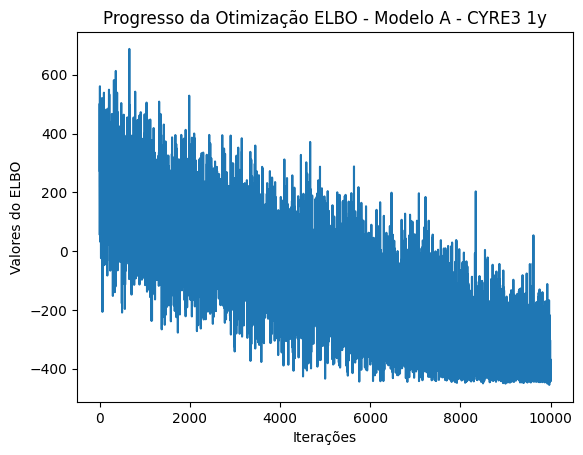

In [60]:
plt.plot(trace_approx.hist)
plt.title('Progresso da Otimização ELBO - Modelo A - CYRE3 1y')
plt.xlabel('Iterações')
plt.ylabel('Valores do ELBO')
plt.show();

`plt.plot(trace_approx.hist)`:
- `trace_approx.hist` contém o histórico do valor da função de perda (ELBO - Evidence Lower Bound) ao longo das iterações do algoritmo de otimização durante o ajuste da distribuição aproximada e plotando esse histórico usando `plt.plot()`, onde o eixo x representa as iterações e o eixo y representa o valor do ELBO em cada iteração.

`plt.title('Progresso da Otimização ELBO - Modelo A')`:
- Define o título do gráfico como "Progresso da Otimização ELBO - Modelo A".

`plt.xlabel('Iterações'):`
- Define o rótulo do eixo x como "Iterações".

`plt.ylabel('Valor do ELBO')`:
- Define o rótulo do eixo y como "Valor do ELBO".

`plt.show()`:
- Exibe o gráfico

##Distribuição da Condicional para a Posteriori - Modelo A

In [61]:
with model_A:
    x_test_c = gp.conditional('x_test', x_test.reshape(-1,1))
    pred_m = pm.sample_posterior_predictive(trace, var_names=["x_test"])

`pred_m = pm.sample_posterior_predictive(trace, var_names=["x_test"])`:
-  Este método é usado para amostrar previsões a posteriori do modelo Bayesiano.

`trace`:
- São as amostras da distribuição a posteriori do modelo, geralmente obtidas após o ajuste do modelo usando MCMC.

`var_names = ["x_test"]`:
- Especifica as variáveis que queremos amostrar previsões a posteriori. Aqui, estamos interessados nas previsões para os pontos de teste `x_test`.

O resultado dessas previsões é armazenado em `pred_m`. Essas previsões representam amostras da distribuição a posteriori das observações nos pontos de teste `x_test`, condicionadas aos dados observados e aos parâmetros do modelo estimados a partir de `trace`.

##Plotagem do Gráfio da Preditiva a Posteriori - Modelo A

<ipython-input-62-080e8342690c>:4: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(pred_m, group="posterior_predictive", num_samples=200)["x_test"],


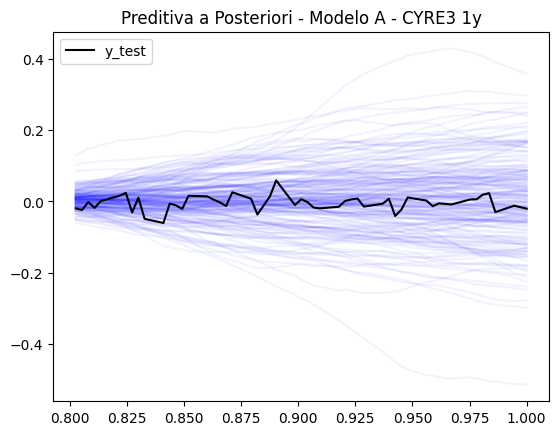

In [62]:
fig, ax = plt.subplots()
ax.plot(
    x_test,
    az.extract_dataset(pred_m, group="posterior_predictive", num_samples=200)["x_test"],
    color="blue",
    alpha=0.05,
)
sns.lineplot(x=x_test.flatten(), y=y_test.flatten(), color="k", label='y_test', ax=ax)
ax.set_title("Preditiva a Posteriori - Modelo A - CYRE3 1y");

#Modelo B

##White Noise - Ruído Branco
**Definição Básica**
- Características Fundamentais:
  - Série de variáveis aleatórias não correlacionadas e com média zero.
  - Variância constante ao longo do tempo.

**Propriedades do Ruído Branco**
- Independência:
  - Cada observação é independente das outras.

- Aleatoriedade:
  - Distribuição de cada observação é constante e idêntica.

In [63]:
with pm.Model() as model_B:

    l_ratquad = pm.HalfNormal('l_ratquad', sigma=1)
    alpha_ratquad = pm.HalfNormal('alpha_ratquad', sigma=1)
    sigma_ratquad = pm.HalfNormal('sigma_ratquad', sigma=1)

    l_expquad = pm.HalfNormal('l_expquad', sigma=2)
    sigma_expquad = pm.HalfNormal('sigma_expquad', sigma=2)
    cov_expquad = sigma_expquad * pm.gp.cov.ExpQuad(1, l_expquad)

    l_matern32 = pm.HalfNormal('l_matern32', sigma=0.5)
    sigma_matern32 = pm.HalfNormal('sigma_matern32', sigma=0.5)

    cov_ratquad = sigma_ratquad * pm.gp.cov.RatQuad(1, l_ratquad, alpha_ratquad)
    cov_matern32 = sigma_matern32 * pm.gp.cov.Matern32(1, l_matern32)

    cov = cov_ratquad + cov_matern32 + cov_expquad

    gp = pm.gp.Marginal(cov_func=cov)
    sigma = pm.HalfNormal('sigma', sigma=1)
    wn = pm.gp.cov.WhiteNoise(sigma) #WhiteNoise ou Ruido Branco

    y_obs = gp.marginal_likelihood('y', X=x_train.reshape(-1,1),y=y_train, noise=wn)

/usr/local/lib/python3.10/dist-packages/pymc/gp/gp.py:56: FutureWarning: The 'noise' parameter has been been changed to 'sigma' in order to standardize the GP API and will be deprecated in future releases.
  warnings.warn(_noise_deprecation_warning, FutureWarning)


`l_ratquad = pm.HalfNormal('l_ratquad', sigma=1)`

`alpha_ratquad = pm.HalfNormal('alpha_ratquad', sigma=1)`

`sigma_ratquad = pm.HalfNormal('sigma_ratquad', sigma=1)`

- Define as variáveis `l_ratquad`, `alpha_ratquad` e `sigma_ratquad`, que representam o comprimento de escala do kernel Racional Quadrático (RatQuad).

`pm.HalfNormal`: Indica que essa variável segue uma distribuição normal truncada na metade positiva, com valores maiores que zero.

`sigma = 1`:
- Define o desvio padrão das três distribuições com HalfNormal como 1.

`l_expquad = pm.HalfNormal('l_expquad', sigma=2)`

`sigma_expquad = pm.HalfNormal('sigma_expquad', sigma=2)`

- Define as variáveis `l_expquad` e `sigma_expquad` onde representam o comprimento de escala do kernel Quadrático Exponencial (ExpQuad).

- `pm.HalfNormal`: Indica que essa variável segue uma distribuição normal truncada na metade positiva, com valores maiores que zero.

`sigma = 2`:
- Define o desvio padrão das duas distribuições com HalfNormal como 2.

`cov_expquad = sigma_expquad * pm.gp.cov.ExpQuad(1, l_expquad)`:
- Define a matriz de covariância para o kernel ExpQuad multiplicando seu desvio padrão `sigma_expquad` pelo kernel ExpQuad.

 `pm.gp.cov.ExpQuad(1, l_expquad)`:
- Cria uma função de covariância do kernel ExpQuad com uma dimensão e comprimento de escala `l_expquad`

`l_matern32 = pm.HalfNormal('l_matern32', sigma=0.5)`:
- Define a variável `l_matern32` que representa o comprimento de escala do kernel Matern32.

`sigma = 0.5`:
- Define o desvio padrão da distribuição com HalfNormal como 0.5.

`sigma_matern32 = pm.HalfNormal('sigma_matern32', sigma=0.5)`:
- Define a variável `sigma_matern32` que representa o desvio padrão do kernel Matern32.

`sigma = 0.5`:
- Define o desvio padrão da distribuição com HalfNormal como 0.5.

`cov_ratquad = sigma_ratquad * pm.gp.cov.RatQuad(1, l_ratquad, alpha_ratquad)`:
- Define a matriz de covariância para o kernel RatQuad multiplicando seu desvio padrão `sigma_ratquad` pelo kernel RatQuad.

`pm.gp.cov.RatQuad(1, l_ratquad, alpha_ratquad)`:
- Cria uma função de covariância do kernel RatQuad com uma dimensão e comprimento de escala `l_ratquad` e parâmetro de suavização `alpha_ratquad`.

`cov_matern32 = sigma_matern32 * pm.gp.cov.Matern32(1, l_matern32)`:
- Define a matriz de covariância para o kernel Matern32 multiplicando seu desvio padrão `sigma_matern32` pelo kernel Matern32.

`pm.gp.cov.Matern32(1, l_matern32)`:
- Cria uma função de covariância do kernel Matern32 com uma dimensão e comprimento de escala `l_matern32`.

`cov = cov_ratquad + cov_matern32 + cov_expquad`:
- Combina as matrizes de covariância dos kernels RatQuad, Matern32 e ExpQuad para formar uma única matriz de covariância `cov`.

`gp = pm.gp.Marginal(cov_func=cov)`:
- Define um processo gaussiano (GP) marginal com a matriz de covariância `cov` especificada acima.

`sigma = pm.HalfNormal('sigma', sigma=1)`:
- Define a variável `sigma` que representa o desvio padrão do ruído nos dados observados.

`sigma = 1`:
- Define o desvio padrão da distribuição com HalfNormal como 1.

`wn = pm.gp.cov.WhiteNoise(sigma)`:
- Define um componente de ruído branco (`WhiteNoise`) com desvio padrão `sigma` especificado acima.

`sigma`:
- Parâmetro de desvio padrão da distribuição de ruído branco.

`y_obs = gp.marginal_likelihood('y', X=x_train.reshape(-1,1),y=y_train, noise=wn)`:
- Define a probabilidade marginal da verossimilhança


##Sample da Priori do Modelo B

In [64]:
with model_B:
  prior = pm.sample_prior_predictive()

`pm.sample_prior_predictive()`:
- Este método é usado para amostrar dados sintéticos a partir das distribuições a priori especificadas no modelo. Esses dados representam uma simulação dos dados antes de observar os dados reais.

##Plotagem da amostra a priori do Modelo B

<ipython-input-65-1f202fb0afa0>:4: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(prior, group="prior_predictive", num_samples=100)["y"]


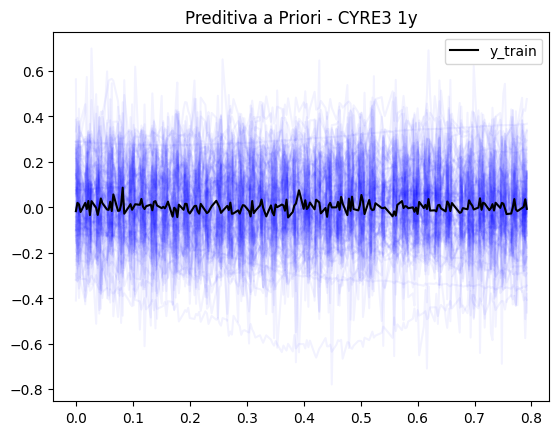

In [65]:
fig, ax = plt.subplots()
ax.plot(
    x_train,
    az.extract_dataset(prior, group="prior_predictive", num_samples=100)["y"]
    * y_train.max(),
    color="blue",
    alpha=0.05,
)
sns.lineplot(x=x_train.flatten(), y=y_train.flatten(), color="k", label='y_train', ax=ax)
ax.set_title("Preditiva a Priori - CYRE3 1y");

`ax.plot(x_train, az.extract_dataset(prior, group="prior_predictiv", num_samples=100)["y"] * y_train.max(), color="blue", alpha=0.05)`:

`ax.plot()`:
- Este método é usado para traçar um gráfico de linha nos eixos especificados.

`x_train`:
- Os valores de entrada para o eixo x do gráfico.

`az.extract_dataset(prior, group="prior_predictive", num_samples=100)["y"] * y_train.max()`:
- Gerando dados sintéticos a partir das distribuições a priori do modelo prior usando o método `extract_dataset()` da biblioteca ArviZ. Especificando a amostra dos dados da distribuição `prior_predictive` e multiplicando esses dados pelo valor máximo dos dados de treinamento (`y_train.max()`).

`color = "blue"`:
- Define a cor da linha como azul.

`alpha=0.05`:
- Define a transparência da linha como 0.05, o que a torna parcialmente transparente.

`sns.lineplot(x=x_train.flatten(), y=y_train.flatten(), color="k", label='y_train', ax=ax)`:

`sns.lineplot()`:
- Este método é usado para traçar um gráfico de linha usando a biblioteca Seaborn.

`x=x_train.flatten(), y=y_train.flatten()`:
- Define os valores de entrada e saída para o gráfico de linha. Usando os dados de treinamento `x_train` e `y_train`, que são achatados (flatten) para garantir que tenham a mesma forma.

`color="k"`:
- Define a cor da linha como preto.

`label='y_train'`:
- Define o rótulo da linha como 'y_train', que será usado na legenda.

`ax=ax`:
- Especifica que queremos traçar este gráfico nos eixos `ax`.

`ax.set_title("Preditiva a Priori - Modelo B")`:

`ax.set_title()`:
- Define o título do gráfico.

`"Preditiva a Priori - Modelo B"`:
- É o título que atribuímos ao gráfico.

##Distribuição Aproximada para a Posteriori

In [66]:
with model_B:
  trace_approx_B = pm.fit()
  trace_B = trace_approx_B.sample()

`trace_approx_B = pm.fit()`:

`pm.fit()`:
- Este método é usado para ajustar a distribuição aproximada (ou variacional) para o modelo Bayesiano. Isso é feito usando um algoritmo de otimização para minimizar a divergência KL entre a distribuição aproximada e a verdadeira distribuição a posteriori.

`trace_approx_B`: Armazena o resultado do ajuste da distribuição aproximada.

`trace_B = trace_approx_B.sample()`:

`trace_approx_B.sample()`:
- Este método é usado para extrair amostras da distribuição aproximada ajustada. Essas amostras representam uma aproximação da verdadeira distribuição a posteriori do modelo `model_B`.

`trace_B`:
- Armazena as amostras extraídas da distribuição aproximada.

##Plotagem da Otimização ELBO - Evidence Lower Bound - Modelo B

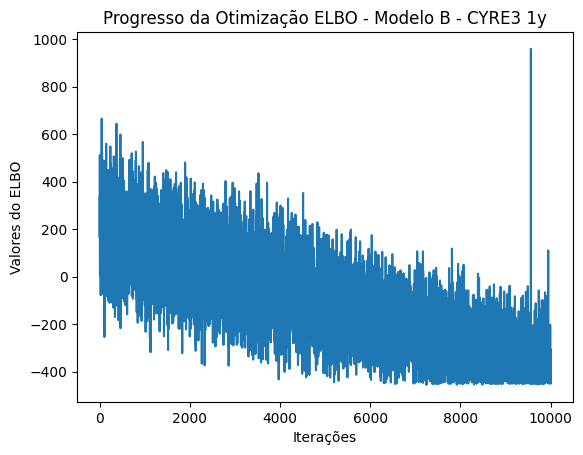

In [67]:
plt.plot(trace_approx_B.hist)
plt.title('Progresso da Otimização ELBO - Modelo B - CYRE3 1y')
plt.xlabel('Iterações')
plt.ylabel('Valores do ELBO')
plt.show();

`plt.plot(trace_approx_B.hist)`:
- `trace_approx.hist` contém o histórico do valor da função de perda (ELBO - Evidence Lower Bound) ao longo das iterações do algoritmo de otimização durante o ajuste da distribuição aproximada e plotando esse histórico usando `plt.plot()`, onde o eixo x representa as iterações e o eixo y representa o valor do ELBO em cada iteração.

`plt.title('Progresso da Otimização ELBO - Modelo B')`:
- Define o título do gráfico como "Progresso da Otimização ELBO - Modelo B".

`plt.xlabel('Iterações'):`
- Define o rótulo do eixo x como "Iterações".

`plt.ylabel('Valor do ELBO')`:
- Define o rótulo do eixo y como "Valor do ELBO".

`plt.show()`:
- Exibe o gráfico

##Distribuição Condicional para a Posteriori - Modelo B

In [68]:
with model_B:
    x_test_c = gp.conditional('x_test', x_test.reshape(-1,1))
    pred_m_B = pm.sample_posterior_predictive(trace_B, var_names=["x_test"])

`x_test_c = gp.conditional('x_test', x_test.reshape(-1,1))`:

`gp.conditional('x_test', x_test.reshape(-1,1))`:
- Este método é usado para calcular a distribuição condicional do processo gaussiano (gp) dado um conjunto de pontos de teste (`x_test`).

`'x_test'`:
- É o nome que foi dado a essa distribuição condicional para referência futura.

`x_test.reshape(-1,1)`:
- É o conjunto de pontos de teste, mas antes de passá-los para o método `conditional`, eles são remodelados para terem uma única dimensão, pois alguns métodos do PyMC3 esperam que os dados tenham essa forma.

`x_test_c`:
- Armazena a distribuição condicional calculada do processo gaussiano para os pontos de teste `x_test`. Essa distribuição representa a distribuição do processo gaussiano condicionado aos pontos de teste fornecidos.

`pred_m_B = pm.sample_posterior_predictive(trace_B, var_names=["x_test"])`:

`pm.sample_posterior_predictive(trace_B, var_names=["x_test"])`:
- Este método é usado para amostrar previsões a posteriori do modelo Bayesiano.

`trace_B`:
- São as amostras da distribuição a posteriori do modelo, geralmente obtidas após o ajuste do modelo usando MCMC.

`var_names=["x_test"]`:
- Especifica as variáveis para as quais queremos amostrar previsões a posteriori, que nesse caso para as previsões são os pontos de teste `x_test`.

`pred_m_B`:
- Armazena as previsões a posteriori amostradas para os pontos de teste `x_test` com base nas amostras do traço `trace_B`.

###Plotagem do Gráfio da Preditiva a Posteriori - Modelo B

<ipython-input-69-cf3c056bb3f6>:4: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(pred_m_B, group="posterior_predictive", num_samples=200)["x_test"],


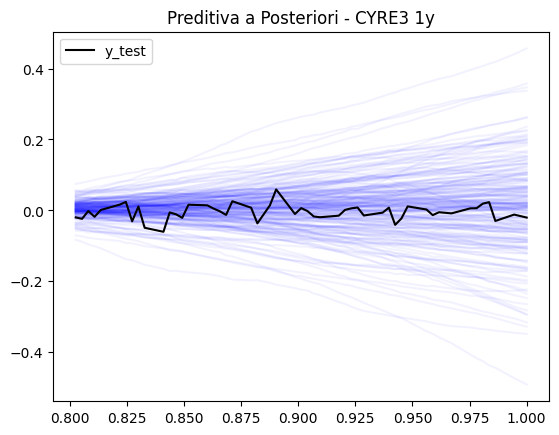

In [69]:
fig, ax = plt.subplots()
ax.plot(
    x_test,
    az.extract_dataset(pred_m_B, group="posterior_predictive", num_samples=200)["x_test"],
    color="blue",
    alpha=0.05,
)
sns.lineplot(x=x_test.flatten(), y=y_test.flatten(), color="k", label='y_test', ax=ax)
ax.set_title("Preditiva a Posteriori - CYRE3 1y");

Segue os mesmo paramêtros da priori, porem, agora, com os dados da posteriori

##Sample para gerar modelo final ajustado com os Modelos A e B

In [70]:
f_pred_samples = az.extract(pred_m_B, group="posterior_predictive", var_names=["x_test"])

`f_pred_samples = az.extract(pred_m_B, group="posterior_predictive", var_names=["x_test"])`:

`az.extract(pred_m_B, group="posterior_predictive", var_names=["x_test"])`:
- Este método da biblioteca ArviZ é usado para extrair amostras específicas de um grupo particular de variáveis de um objeto de amostras posterior predictivo.

`pred_m_B`:
- Este é o objeto que contém as amostras posterior predictivas do modelo `model_B` para os pontos de teste `x_test`.

`group="posterior_predictive"`:
- Especifica que queremos extrair amostras do grupo `posterior_predictive`. Este grupo contém as amostras geradas pela previsão a posteriori.

`var_names=["x_test"]`:
- Especifica a extração das amostras apenas para a variável `x_test`.

`f_pred_samples`:
- Armazena as amostras extraídas para a variável x_test do grupo posterior_predictive.

##Plotagem do Modelo Final Ajustado com as Posterioris dos Modelos A e B

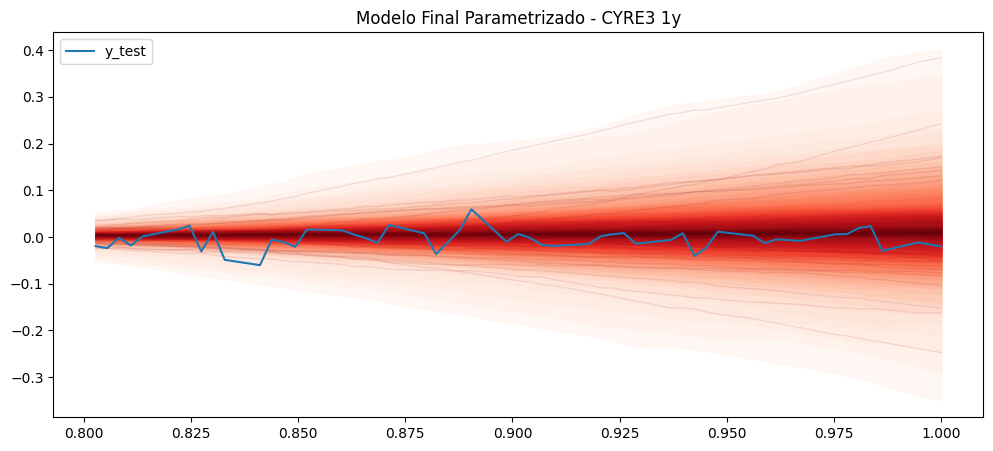

In [71]:
from pymc.gp.util import plot_gp_dist

fig = plt.figure(figsize=(12,5)); ax = fig.gca()

plot_gp_dist(ax, f_pred_samples.T, x_test);

sns.lineplot(x=x_test.flatten(), y=y_test.flatten(), label='y_test', ax=ax);

plt.title("Modelo Final Parametrizado - CYRE3 1y");
plt.show();

`from pymc.gp.util import plot_gp_dist`:
- Importa a função `plot_gp_dist` do módulo `pymc.gp.util`. Esta função é usada para traçar a distribuição de um processo gaussiano.

`fig = plt.figure(figsize=(12,5)); ax = fig.gca()`:

`fig = plt.figure(figsize=(12,5))`:
- Cria uma nova figura com tamanho 12x5 polegadas.

`ax = fig.gca()`:
- Obtém o objeto `ax` (eixos) da figura recém-criada. `gca` significa "get current axes" (obter os eixos atuais).

`plot_gp_dist(ax, f_pred_samples.T, x_test)`:
- Plota a distribuição do processo gaussiano nos eixos `ax`.

`ax`:
- Os eixos onde a distribuição será traçada.

`f_pred_samples.T`:
-  As amostras extraídas da previsão a posteriori, transpostas (invertendo filas e colunas) para garantir que a forma dos dados esteja correta para a função de plotagem.

`x_test`:
- Os valores do eixo x para os quais a distribuição será plotada. Esses são os pontos de teste.

`sns.lineplot(x=x_test.flatten(), y=y_test.flatten(), label='y_test', ax=ax)`:

`sns.lineplot()`:
- Este método é usado para plotar um gráfico de linha usando a biblioteca Seaborn.

`x=x_test.flatten()`:
- Os valores do eixo x, achatados para garantir que estejam em uma dimensão.

`y=y_test.flatten()`:
- Os valores do eixo y, achatados para garantir que estejam em uma dimensão.

`label='y_test'`:
- Define o rótulo da linha como `'y_test'`, que será usado na legenda.

`ax=ax`:
- Especifica que queremos plotar este gráfico nos eixos `ax`.

### **Diferenças entre Modelo A e Modelo B**

#### Modelo A

- **Componentes de Covariância:**
  - Utiliza `RatQuad` e `Matern32` como funções de covariância.
  - `sigma_ratquad`, `l_ratquad`, `alpha_ratquad` têm sigma=4.
  - `sigma_matern32`, `l_matern32` têm sigma=0.1.

- **Componente Linear:**
  - Incorpora uma tendência linear determinística (`trend = pm.Deterministic("trend", a + b*x_train)`).

- **Modelo de Média e Processo Gaussiano:**
  - Define um modelo de média linear (`M`) para o processo gaussiano (`gp = pm.gp.Marginal(mean_func=M, cov_func=cov)`).

- **Verossimilhança Marginal:**
  - Usa `gp.marginal_likelihood` para calcular a verossimilhança marginal dos dados observados (`y_obs`), considerando o ruído `sigma`.

#### Modelo B

- **Componentes de Covariância:**
  - Utiliza `RatQuad`, `Matern32` e `ExpQuad` como funções de covariância.
  - `sigma_ratquad`, `l_ratquad`, `alpha_ratquad` têm sigma=1.
  - `sigma_matern32`, `l_matern32` têm sigma=0.5.
  - `sigma_expquad`, `l_expquad` têm sigma=2.

- **Modelo de Processo Gaussiano:**
  - Não especifica um modelo de média (`M`), utiliza apenas a função de covariância (`gp = pm.gp.Marginal(cov_func=cov)`).

- **Ruído Adicional:**
  - Introduz ruído branco (`wn = pm.gp.cov.WhiteNoise(sigma)`) além do modelo de covariância principal.

- **Verossimilhança Marginal:**
  - Calcula a verossimilhança marginal dos dados observados (`y_obs`) considerando o ruído branco adicionado.

### Comentários Adicionais

- O Modelo A parece mais focado na modelagem detalhada das componentes de covariância `RatQuad` e `Matern32`, além de uma tendência linear explícita.
- O Modelo B incorpora uma maior variedade de funções de covariância (`RatQuad`, `Matern32`, `ExpQuad`) e adiciona ruído branco como um componente separado.


##Plotagem do Erro Médio Absoluto

In [72]:
y_pred_matern = pred_m_B.posterior_predictive["x_test"].values.mean(axis=1)[0]
print(f"MAE: {abs(y_pred_matern - y_test).sum()/len(y_test)}")

MAE: 0.019048643252012745


`y_pred = pred_m_B.posterior_predictive["x_test"].values.mean(axis=1)[0]`:

`pred_m_B.posterior_predictive["x_test"].values`:
- Acessa os valores das amostras da previsão a posteriori para `x_test` no objeto `pred_m_B`.

`pred_m_B`:
- Este objeto contém as amostras da previsão a posteriori do modelo `model_B`.

`posterior_predictive`:
- O grupo que contém as previsões a posteriori.

`["x_test"`]: Acessa especificamente as previsões para x_test.

# O modelo Prophet (Meta)

O modelo Prophet, desenvolvido pelo Facebook, é amplamente utilizado para previsão de séries temporais, especialmente útil para dados com padrões sazonais claros e feriados, ou eventos que não seguem uma periodicidade regular. Ele é robusto a dados faltantes e mudanças na tendência, e funciona bem com séries temporais que têm variações sazonais fortes e históricos de vários anos.

O modelo Prophet separa a série temporal em três componentes principais:

Tendência (Trend): Representa a componente que modela as mudanças não periódicas e de longo prazo na série temporal.
Sazonalidade (Seasonality): Modela os padrões periódicos que se repetem regularmente, como sazonalidade diária, semanal, mensal, ou anual.
Feriados e Eventos (Holidays and Events): São componentes que modelam irregularidades que não seguem um padrão fixo, como feriados ou eventos especiais que podem ter efeitos sobre a série temporal.

A fórmula é dada por:

A fórmula usada pelo Prophet para modelar uma série temporal y(t) é expressa como:
$y(t)=g(t)+s(t)+h(t)+ ɛ$

onde:
- g(t) representa a função de tendência, que modela mudanças não periódicas na série temporal.
- s(t) representa a função de sazonalidade, capturando padrões periódicos dentro dos dados.
- h(t) representa os efeitos de feriados e eventos específicos.
- ɛ é o termo de erro, assumindo que os resíduos dos dados são normalmente distribuídos.

### Funcionamento do Código com Prophet em PyMC3

#### Preparação dos Dados e Modelo Inicial

- **Inicialização do Modelo:**
  - Utilização de `pm.Model()` para configurar o contexto do modelo bayesiano.

- **Dados Mutáveis:**
  - `MutableData` é usado para `X_` e `y_`, permitindo atualizações dos dados durante a modelagem.

- **Definição das Variáveis Aleatórias:**
  - `breakpoint`, `intercept`, `slope1`, `slope2`: Variáveis normais que definem o ponto de quebra e os parâmetros da tendência linear.

- **Modelagem da Tendência:**
  - Utiliza `tt.switch` para definir a tendência (`trend`) com base no `breakpoint`.

- **Componente de Ruído:**
  - `σ = pm.HalfNormal("σ", sigma=1)` define o desvio padrão do modelo probabilístico.

- **Verossimilhança:**
  - `pm.Normal("likelihood", mu=μ, sigma=σ, observed=y_)` define a distribuição normal para calcular a verossimilhança dos dados observados (`y_`).

#### Amostragem Preditiva a Priori

- **Amostragem Preditiva:**
  - `pm.sample_prior_predictive()` é usado para amostrar previsões antes da inferência.

- **Visualização da Preditiva a Priori:**
  - Gráficos mostram as previsões antes da atualização com os dados (`y_train`), incluindo a distribuição das previsões (`likelihood`) e as tendências esperadas (`trend`).

#### Inferência e Amostragem Preditiva a Posteriori

- **Inferência Bayesiana:**
  - `pm.sample()` realiza a inferência bayesiana para estimar os parâmetros do modelo.

- **Amostragem Preditiva a Posteriori:**
  - `pm.sample_posterior_predictive(trace_p_p)` gera previsões após a inferência, considerando a incerteza nos parâmetros.

- **Visualização da Preditiva a Posteriori:**
  - Gráfico mostra as previsões após a atualização com os dados (`y_train`), destacando a distribuição das previsões (`likelihood`) comparadas aos dados reais.

#### Extensão da Previsão com Novos Dados

- **Extensão da Previsão:**
  - Introduz novos pontos (`new_points`) para estender a previsão além dos dados originais.

- **Atualização dos Dados:**
  - `pm.set_data(vars)` atualiza `X_`, `y_` e `f_f` com os novos pontos e características.

- **Amostragem Preditiva para Novos Dados:**
  - `pm.sample_posterior_predictive(trace_p_p)` gera previsões para os novos pontos com base nos parâmetros estimados.

- **Visualização da Previsão Estendida:**
  - Gráfico mostra as previsões estendidas (`likelihood`) comparadas aos dados originais (`y_train`), evidenciando a continuidade da previsão.

In [73]:
with pm.Model() as prophet:
    X_ = pm.MutableData("X",x_train)
    y_ = pm.MutableData("y",y_train)

    bp = pm.Normal('breakpoint', mu=0.4, sigma=0.1)
    intercept = pm.Normal('intercept', mu=0, sigma=1)
    slope1 = pm.Normal('slope1', mu=-1, sigma=1)
    slope2 = pm.Normal('slope2', mu=1, sigma=1)

    trend = tt.switch(X_ < bp,
              intercept + slope1 * X_,
              intercept + slope1 * bp + slope2 * (X_ - bp))

    trend = pm.Deterministic("trend", trend)

    σ = pm.HalfNormal("σ", sigma=1)
    pm.Normal("likelihood", mu=trend, sigma=σ, observed=y_)

In [74]:
with prophet:
  p_prior = pm.sample_prior_predictive()

<ipython-input-75-9413e5d34a10>:4: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(p_prior, group="prior_predictive", num_samples=100)["likelihood"]
<ipython-input-75-9413e5d34a10>:13: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(p_prior, group="prior", num_samples=100)["trend"] * y_train.max(),


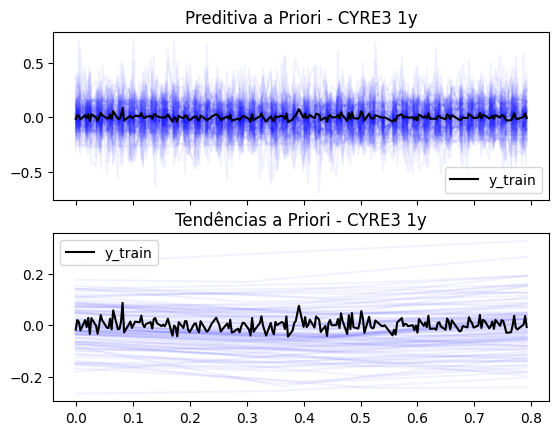

In [75]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
ax[0].plot(
    x_train,
    az.extract_dataset(p_prior, group="prior_predictive", num_samples=100)["likelihood"]
    * y_train.max(),
    color="blue",
    alpha=0.05,
)
sns.lineplot(x=x_train.flatten(), y=y_train.flatten(), color="k", label='y_train', ax=ax[0])
ax[0].set_title("Preditiva a Priori - CYRE3 1y")
ax[1].plot(
    x_train,
    az.extract_dataset(p_prior, group="prior", num_samples=100)["trend"] * y_train.max(),
    color="blue",
    alpha=0.05,
)
sns.lineplot(x=x_train.flatten(), y=y_train.flatten(), color="k",label='y_train', ax=ax[1])
ax[1].set_title("Tendências a Priori - CYRE3 1y");

In [76]:
with prophet:
  trace = pm.sample()

In [77]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
breakpoint,0.361,0.123,0.171,0.622,0.009,0.008,207.0,85.0,1.00
intercept,0.005,0.005,-0.003,0.015,0.000,0.000,520.0,706.0,1.00
slope1,-0.023,0.028,-0.080,0.019,0.001,0.001,441.0,676.0,1.00
slope2,0.013,0.020,-0.026,0.045,0.002,0.002,163.0,51.0,1.01
σ,0.022,0.001,0.020,0.025,0.000,0.000,696.0,684.0,1.00
...,...,...,...,...,...,...,...,...,...
trend[194],0.004,0.004,-0.004,0.011,0.000,0.000,553.0,669.0,1.00
trend[195],0.004,0.004,-0.004,0.011,0.000,0.000,515.0,630.0,1.00
trend[196],0.004,0.004,-0.004,0.011,0.000,0.000,503.0,605.0,1.00
trend[197],0.004,0.004,-0.004,0.011,0.000,0.000,488.0,605.0,1.00


In [78]:
vars = {}
vars["X"] = x_test
vars["y"] = y_test

In [79]:
with prophet:
  pm.set_data(vars)
  trace_post = pm.sample_posterior_predictive(trace)

<ipython-input-80-791c6b80f7ce>:4: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(trace_post, group="posterior_predictive", num_samples=200)["likelihood"],


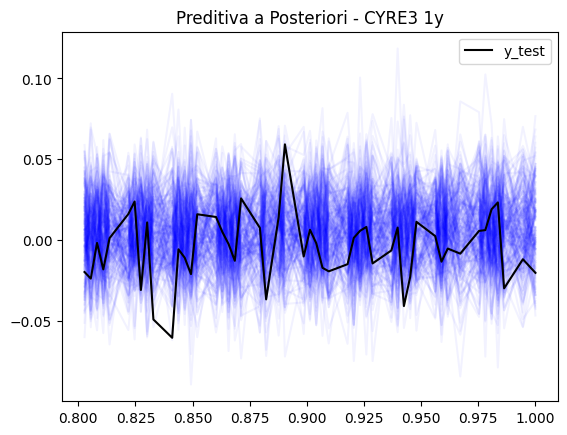

In [80]:
fig, ax = plt.subplots()
ax.plot(
    x_test,
    az.extract_dataset(trace_post, group="posterior_predictive", num_samples=200)["likelihood"],
    color="blue",
    alpha=0.05,
)
sns.lineplot(x=x_test.flatten(), y=y_test.flatten(), color="k", label='y_test', ax=ax)
ax.set_title("Preditiva a Posteriori - CYRE3 1y");

In [81]:
n_order = 3
def get_fourier(n_points,periods):

  x_f = np.linspace(0, periods, n_points)

  fourier_features = pd.DataFrame(
    {
        f"{func}_order_{order}": getattr(np, func)(2 * np.pi * x_f / periods * order)
        for order in range(1, n_order + 1)
        for func in ("sin", "cos")
    }
  )

  return fourier_features

In [82]:
coords = {"fourier_features": np.arange(2 * n_order)}

In [83]:
with pm.Model(coords=coords) as prophet_p:
    X_ = pm.MutableData("X",x)
    y_ = pm.MutableData("y",y)
    n = X_.eval().shape[0]
    fs = get_fourier(n,7)
    fourier_f = pm.MutableData("f_f",fs.values)

    bp = pm.Normal('breakpoint', mu=0.4, sigma=0.1)
    intercept = pm.Normal('intercept', mu=1, sigma=1)
    slope1 = pm.Normal('slope1', mu=1, sigma=1)
    slope2 = pm.Normal('slope2', mu=-1, sigma=1)

    β_fourier = pm.Normal("β_fourier", mu=0, sigma=1, dims="fourier_features")
    seasonality = pm.Deterministic(
        "seasonality", pm.math.dot(β_fourier, fourier_f.T)
    )

    trend = tt.switch(X_ < bp,
              intercept + slope1 * X_,
              intercept + slope1 * bp + slope2 * (X_ - bp))

    trend = pm.Deterministic("trend", trend)

    μ = trend * (1 + seasonality)

    σ = pm.HalfNormal("σ", sigma=1)
    pm.Normal("likelihood", mu=μ, sigma=σ, observed=y_)

In [84]:
with prophet_p:
  p_prior_p = pm.sample_prior_predictive()

<ipython-input-85-954a3f33035c>:4: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(p_prior_p, group="prior_predictive", num_samples=100)["likelihood"]
<ipython-input-85-954a3f33035c>:13: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(p_prior_p, group="prior", num_samples=100)["trend"] * y_train.max(),
<ipython-input-85-954a3f33035c>:21: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(p_prior_p, group="prior", num_samples=100)["seasonality"]


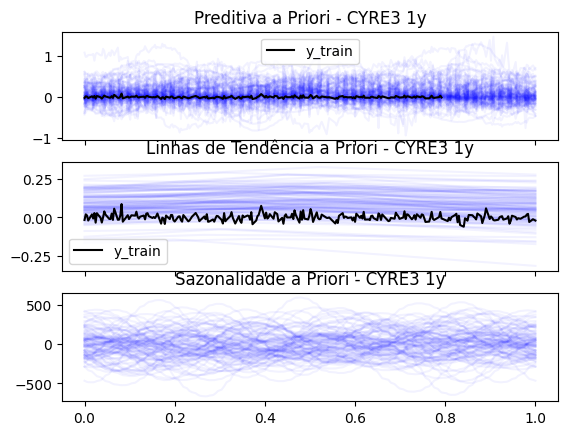

In [85]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)
ax[0].plot(
    x,
    az.extract_dataset(p_prior_p, group="prior_predictive", num_samples=100)["likelihood"]
    * y.max(),
    color="blue",
    alpha=0.05,
)
sns.lineplot(x=x_train.flatten(), y=y_train.flatten(), color="k", label='y_train', ax=ax[0])
ax[0].set_title("Preditiva a Priori - CYRE3 1y")
ax[1].plot(
    x,
    az.extract_dataset(p_prior_p, group="prior", num_samples=100)["trend"] * y_train.max(),
    color="blue",
    alpha=0.05,
)
sns.lineplot(x=x.flatten(), y=y.flatten(), color="k",label='y_train', ax=ax[1])
ax[1].set_title("Linhas de Tendência a Priori - CYRE3 1y")
ax[2].plot(
    x,
    az.extract_dataset(p_prior_p, group="prior", num_samples=100)["seasonality"]
    * 100,
    color="blue",
    alpha=0.05,
)
ax[2].set_title("Sazonalidade a Priori - CYRE3 1y");

In [86]:
with prophet_p:
  trace_p_p = pm.sample()

In [87]:
with prophet_p:
  trace_post_p = pm.sample_posterior_predictive(trace_p_p)

<ipython-input-88-928080c8fb66>:4: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(trace_post_p, group="posterior_predictive", num_samples=200)["likelihood"],


Text(0.5, 1.0, 'Preditiva a Posteriori - CYRE3 1y')

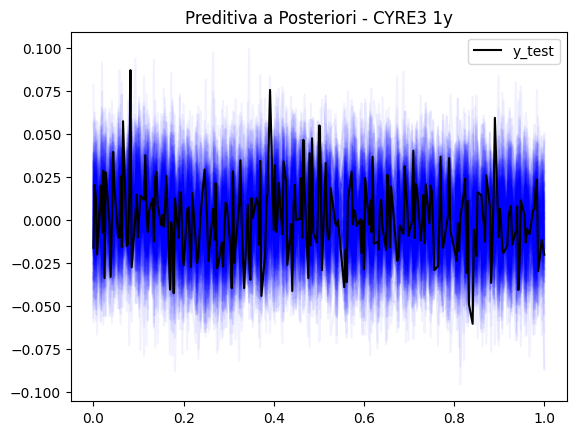

In [88]:
fig, ax = plt.subplots()
ax.plot(
    x,
    az.extract_dataset(trace_post_p, group="posterior_predictive", num_samples=200)["likelihood"],
    color="blue",
    alpha=0.05,
)
sns.lineplot(x=x.flatten(), y=y.flatten(), color="k", label='y_test', ax=ax)
ax.set_title("Preditiva a Posteriori - CYRE3 1y")

In [89]:
y_pred_prophet = trace_post_p.posterior_predictive["likelihood"].values.mean(axis=1)[0]
print(f"MAE: {abs(y_pred_prophet - y).sum()/len(y)}")

MAE: 0.017218914973389704


In [90]:
more_days = 15
new_points = np.arange(1,(more_days+max_day)/(max_day - min_day),1/(max_day-min_day))
new_points

array([1.        , 1.00273973, 1.00547945, 1.00821918, 1.0109589 ,
       1.01369863, 1.01643836, 1.01917808, 1.02191781, 1.02465753,
       1.02739726, 1.03013699, 1.03287671, 1.03561644, 1.03835616])

In [91]:
vars = {}
vars["X"] = new_points
vars["y"] = np.zeros(len(new_points))
vars["f_f"] = get_fourier(len(new_points),7).values

In [92]:
with prophet_p:
  pm.set_data(vars)
  trace_post_p_m = pm.sample_posterior_predictive(trace_p_p)

In [93]:
likelihood_values = trace_post_p_m.posterior_predictive["likelihood"].values
mean_likelihood = np.mean(likelihood_values, axis=(0, 1))
mean_likelihood

array([-2.35869686e-03, -2.83505824e-03, -1.33251829e-03, -7.87570458e-05,
        1.20332067e-03, -1.40908131e-03, -5.47534578e-03, -5.72097566e-03,
       -2.32350114e-03, -1.21946144e-04, -1.88093529e-03, -4.06799629e-03,
       -5.30503550e-03, -4.67078728e-03, -2.69333837e-03])

<ipython-input-94-5c20972aa6a1>:4: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(trace_post_p, group="posterior_predictive", num_samples=200)["likelihood"],
<ipython-input-94-5c20972aa6a1>:12: FutureWarning: extract_dataset has been deprecated, please use extract
  az.extract_dataset(trace_post_p_m, group="posterior_predictive", num_samples=200)["likelihood"],


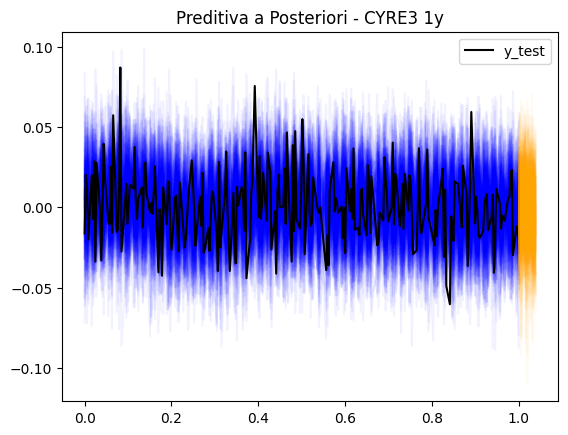

In [94]:
fig, ax = plt.subplots()
ax.plot(
    x,
    az.extract_dataset(trace_post_p, group="posterior_predictive", num_samples=200)["likelihood"],
    color="blue",
    alpha=0.05,
)
sns.lineplot(x=x.flatten(), y=y.flatten(), color="k", label='y_test', ax=ax)
ax.set_title("Preditiva a Posteriori - CYRE3 1y")
ax.plot(
    new_points,
    az.extract_dataset(trace_post_p_m, group="posterior_predictive", num_samples=200)["likelihood"],
    color="orange",
    alpha=0.05,
);

In [95]:
print(f"MAE Matern32: {abs(y_pred_matern - y_test).sum()/len(y_test):.13f}")
print(f"MAE Prophet : {abs(y_pred_prophet - y).sum()/len(y):.13f}")

MAE Matern32: 0.0190486432520
MAE Prophet : 0.0172189149734
